<a href="https://colab.research.google.com/github/rochitanshs/Credit-Risk-Scorecard/blob/main/Credit%20Risk%20Scorecard%20Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [103]:
df = pd.read_csv('loan_data_2015.csv')


<ipython-input-103-2f3069535a04>:1: DtypeWarning: Columns (19,47,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2015.csv')


In [104]:
pd.set_option('display.max_columns', None)
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,60516983,64537751,20000,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,542xx,WI,20.72,0,Sep-00,1,NaN,NaN,25,0,31578,77.0,42,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,52303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41000,NaN,NaN,NaN
1,60187139,64163931,11000,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,235xx,VA,24.57,0,Sep-02,0,36.0,80.0,13,1,5084,38.8,41,w,0.0,0.0,10043.49,10043.49,9942.67,100.81,0.0,0.0,0.0,Oct-15,10059.00,NaN,Jan-16,0,79.0,1,INDIVIDUAL,NaN,NaN,NaN,0,332,175731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100,NaN,NaN,NaN
2,60356453,64333218,7000,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,350xx,AL,32.41,0,Feb-06,1,NaN,NaN,18,0,12070,74.0,36,f,0.0,0.0,221.96,221.96,167.56,54.40,0.0,0.0,0.0,Oct-15,225.84,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,202012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16300,NaN,NaN,NaN
3,59955769,63900496,10000,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,48000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,483xx,MI,30.98,0,Oct-99,2,NaN,NaN,18,0,22950,66.0,41,f,0.0,0.0,315.13,315.13,235.76,79.37,0.0,0.0,0.0,Oct-15,327.34,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,108235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34750,NaN,NaN,NaN
4,58703693,62544456,9550,9550,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,32376.0,Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,546xx,WI,32.54,0,Nov-99,3,69.0,NaN,9,0,4172,29.6,26,w,0.0,0.0,333.66,333.66,195.78,137.88,0.0,0.0,0.0,Oct-15,354.87,NaN,Jan-16,0,69.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,45492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN
5,57783762,61536512,24000,24000,24000,60 months,14.65,566.56,C,C5,Owner,10+ years,MORTGAGE,70000.0,Not Verified,Aug-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,703xx,LA,6.96,0,May-98,0,65.0,NaN,8,0,8256,49.4,19,w,0.0,0.0,547.03,547.03,273.56,273.47,0.0,0.0,0.0,Oct-15,566.56,NaN,Jan-16,0,65.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,126165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16700,NaN,NaN,NaN
6,58010547,61814274,15000,15000,14975,60 months,10.99,326.07,B,B4,ISO,10+ years,RENT,74800.0,Not Verified,Aug-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,700xx,LA,15.63,0,Feb-84,2,NaN,NaN,12,0,4409,6.3,28,f,0.0,0.0,307.75,307.24,188.69,119

In [105]:
na_values = df.isnull().mean()
na_values[na_values>0.8]

desc                         0.999893
mths_since_last_record       0.823282
annual_inc_joint             0.998786
dti_joint                    0.998791
verification_status_joint    0.998786
open_acc_6m                  0.949246
open_il_6m                   0.949246
open_il_12m                  0.949246
open_il_24m                  0.949246
mths_since_rcnt_il           0.950581
total_bal_il                 0.949246
il_util                      0.955789
open_rv_12m                  0.949246
open_rv_24m                  0.949246
max_bal_bc                   0.949246
all_util                     0.949246
inq_fi                       0.949246
total_cu_tl                  0.949246
inq_last_12m                 0.949246
dtype: float64

In [106]:
df.dropna(thresh = df.shape[0]*0.2, axis = 1, inplace = True)

In [107]:
df.drop(columns = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], inplace = True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    421094 non-null  int64  
 1   funded_amnt                  421094 non-null  int64  
 2   funded_amnt_inv              421094 non-null  int64  
 3   term                         421094 non-null  object 
 4   int_rate                     421094 non-null  float64
 5   installment                  421094 non-null  float64
 6   grade                        421094 non-null  object 
 7   emp_length                   397277 non-null  object 
 8   home_ownership               421094 non-null  object 
 9   annual_inc                   421094 non-null  float64
 10  verification_status          421094 non-null  object 
 11  issue_d                      421094 non-null  object 
 12  loan_status                  421094 non-null  object 
 13 

In [109]:
# Identify TARGET VARIABLE. Explore the unique values in loan_status column
df['loan_status'].value_counts(normalize = True)

loan_status
Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: proportion, dtype: float64

In [110]:
df['good_bad'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
df.drop(columns = ['loan_status'], inplace = True)

In [111]:
df['good_bad'].value_counts()

good_bad
1    413243
0      7851
Name: count, dtype: int64

In [112]:
plt.figure(figsize=(30, 20))

<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>],
       [<Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: tit

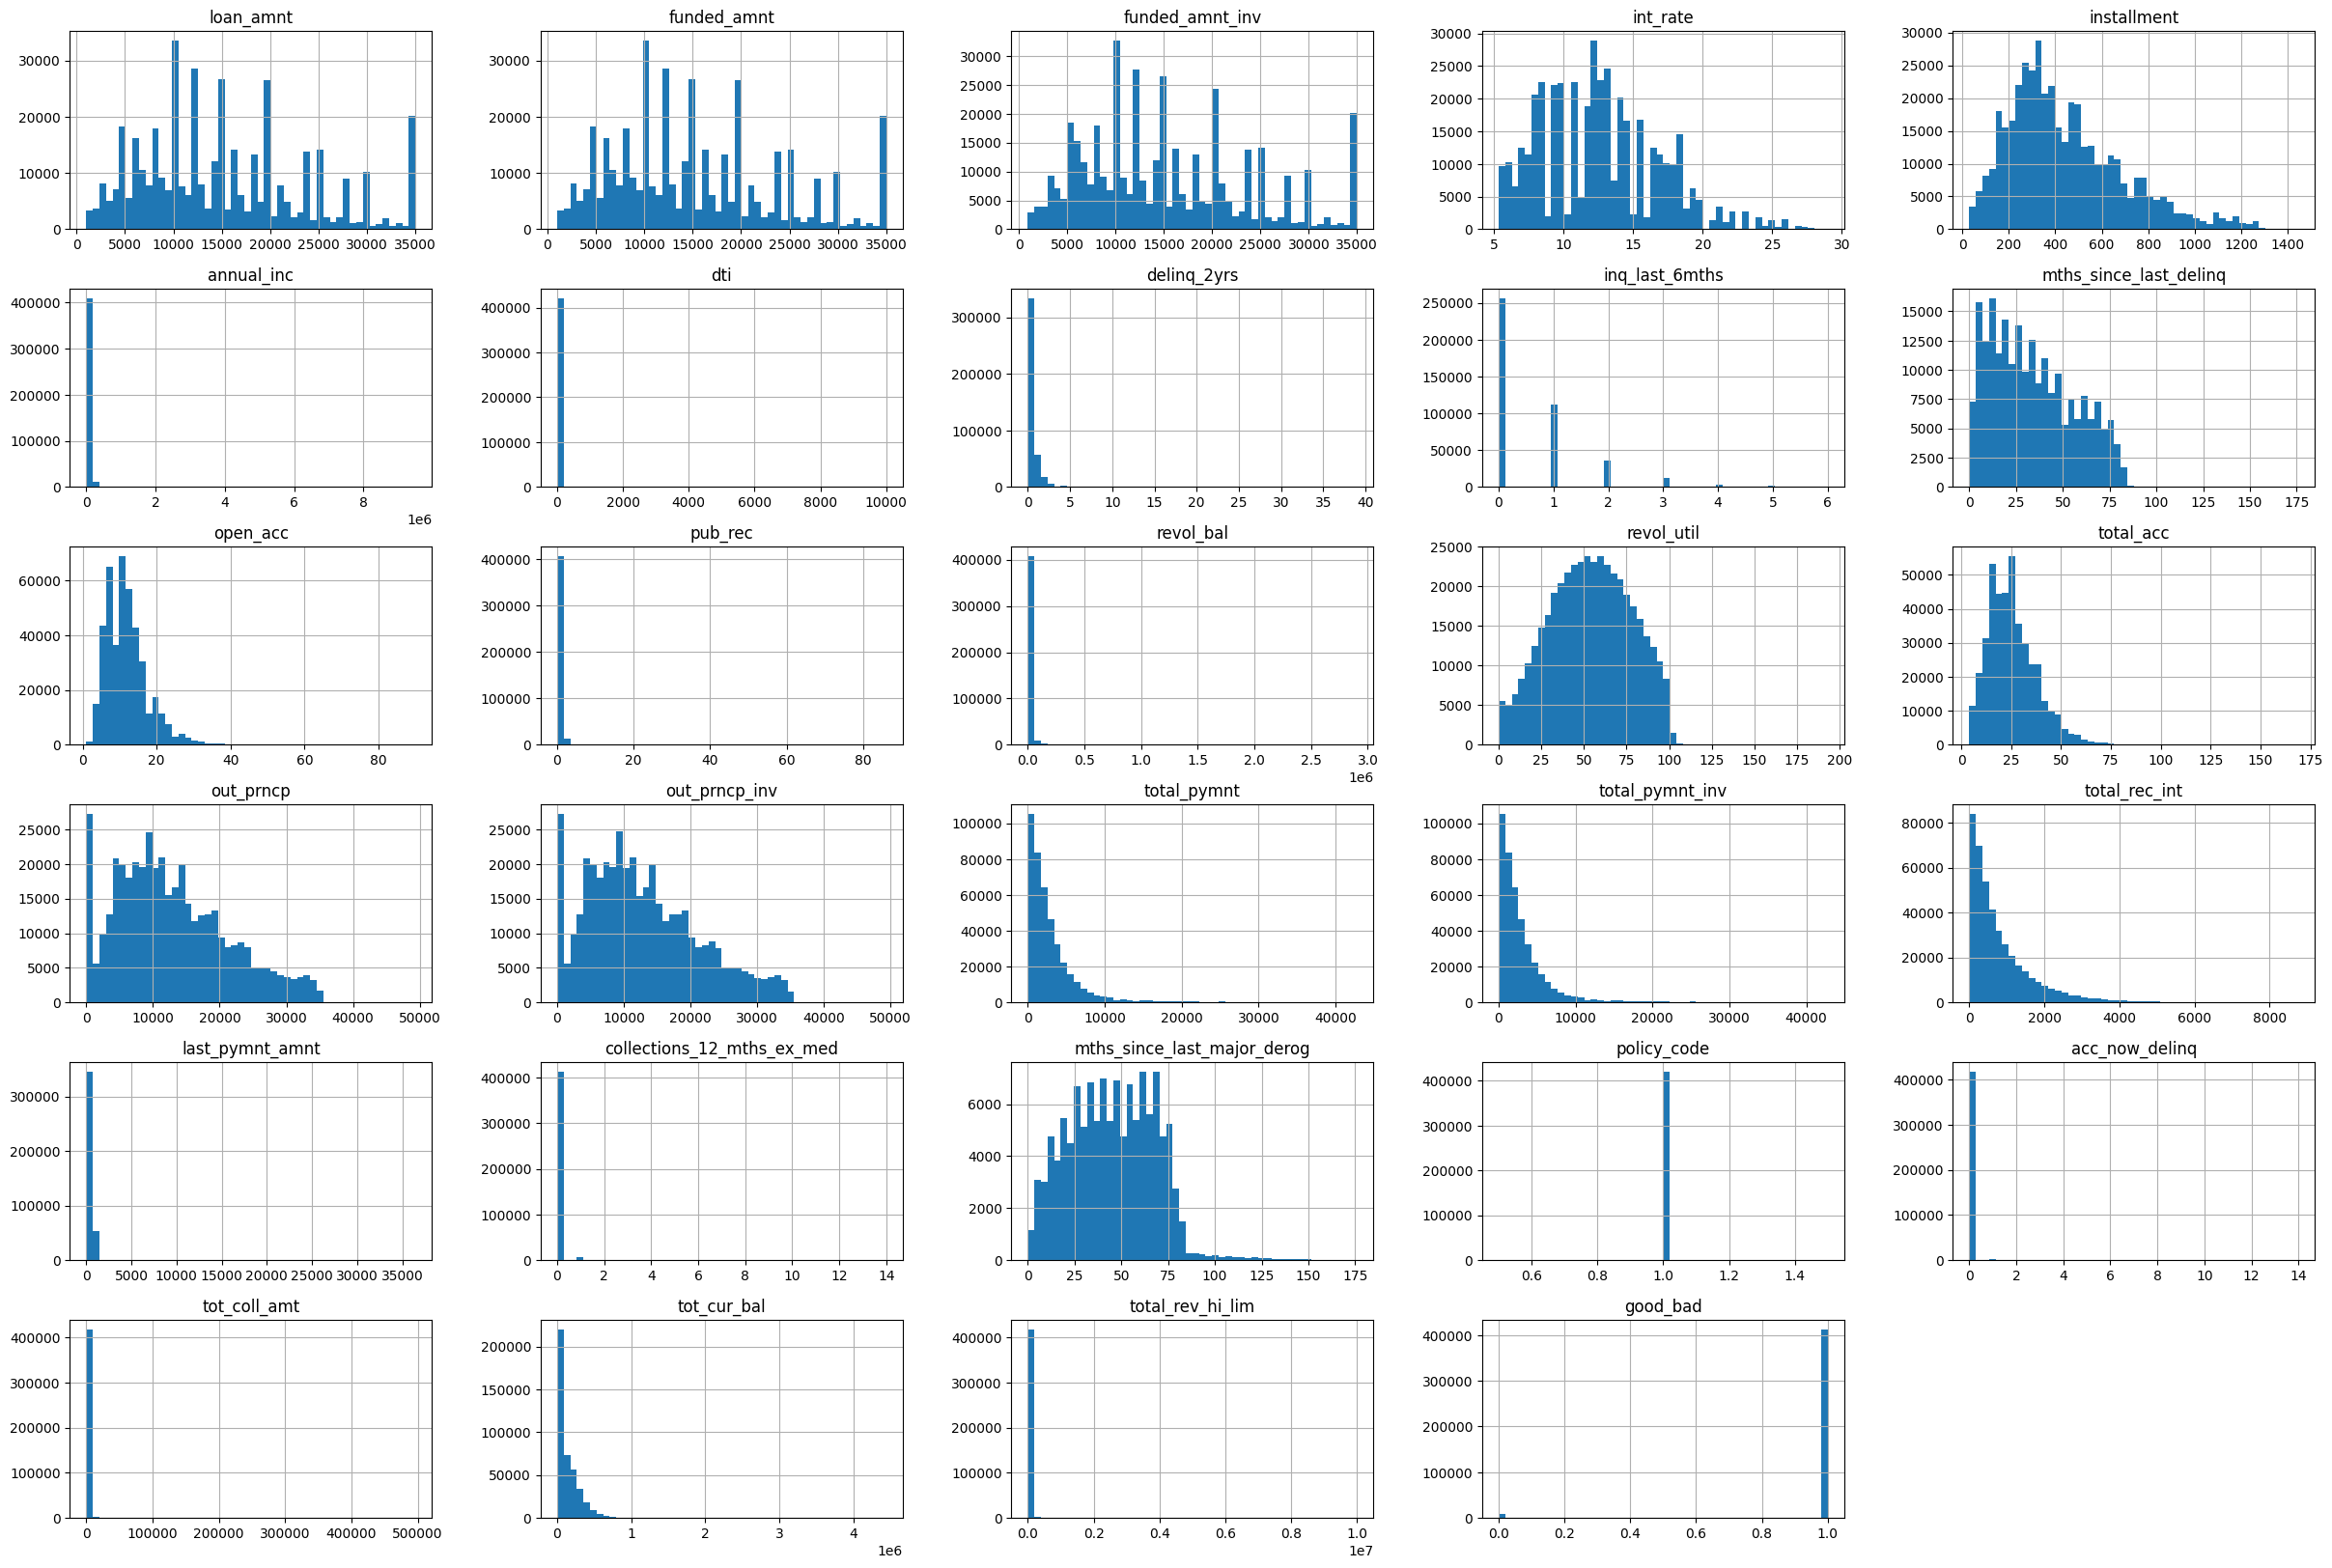

In [113]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns].hist(bins=50, figsize=(30, 20))

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>],
       [<Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>],
       [<Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: tit

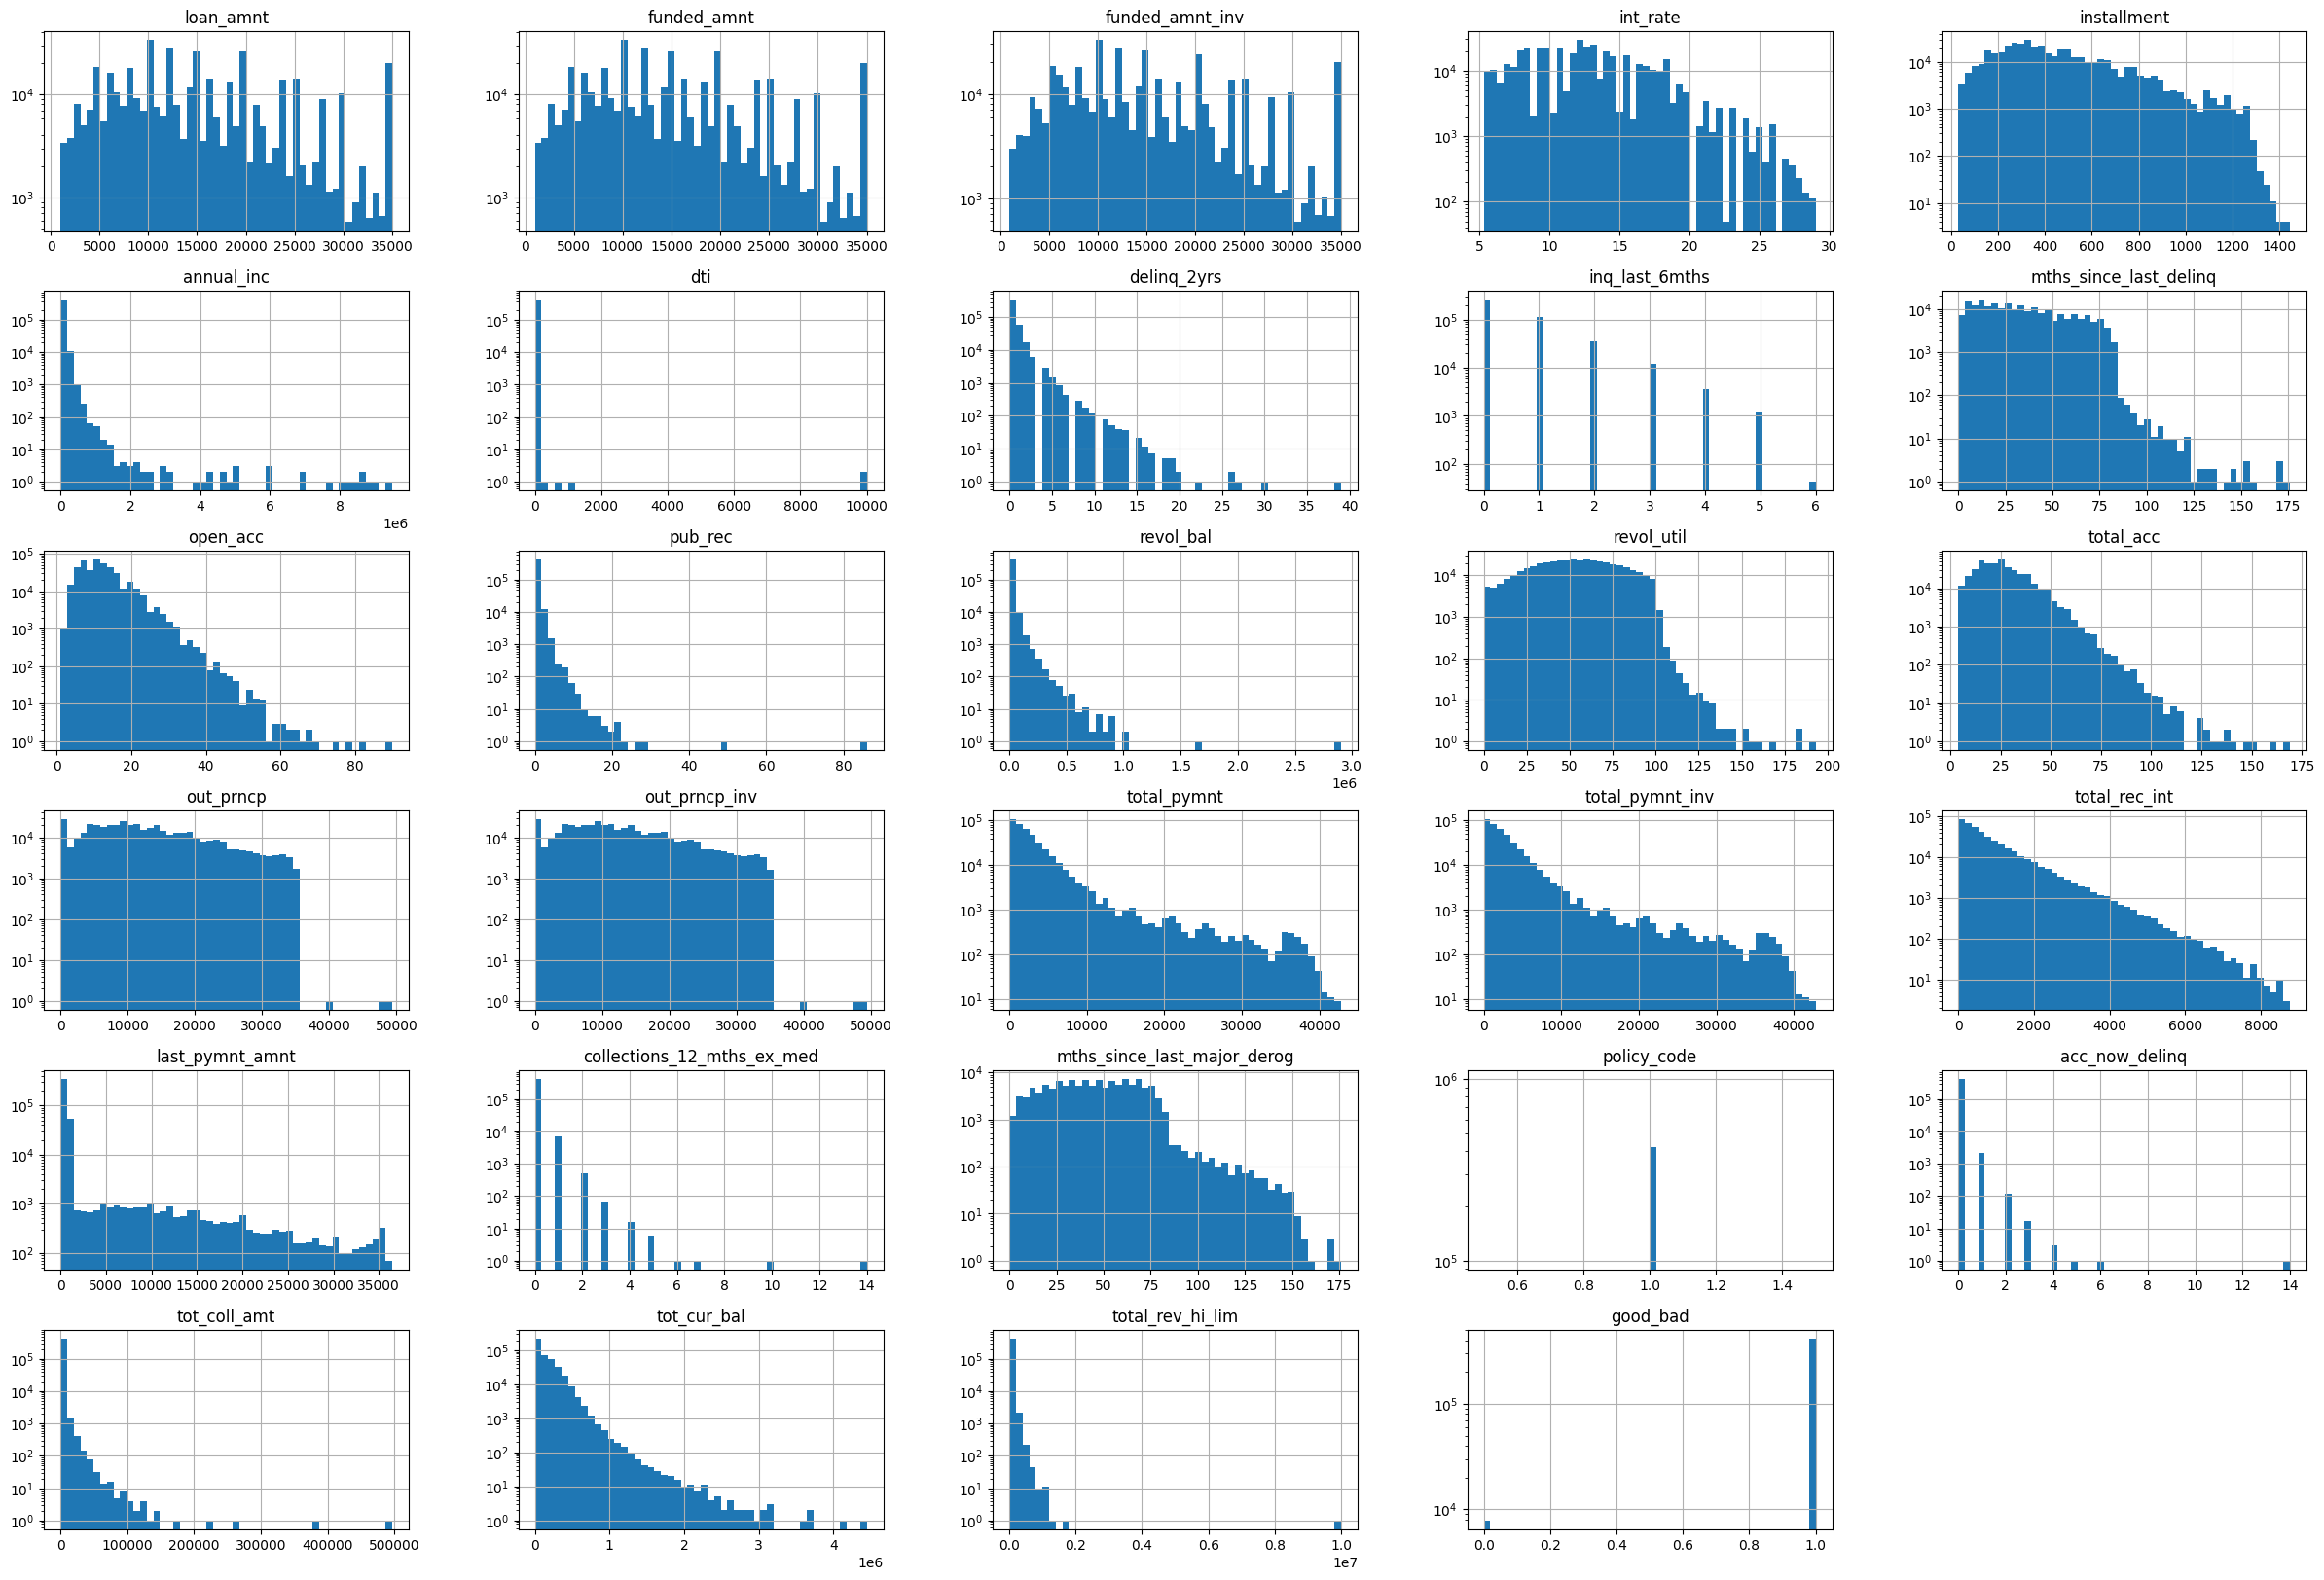

In [114]:
df[numeric_columns].hist(bins=50, figsize=(30, 20), log=True)

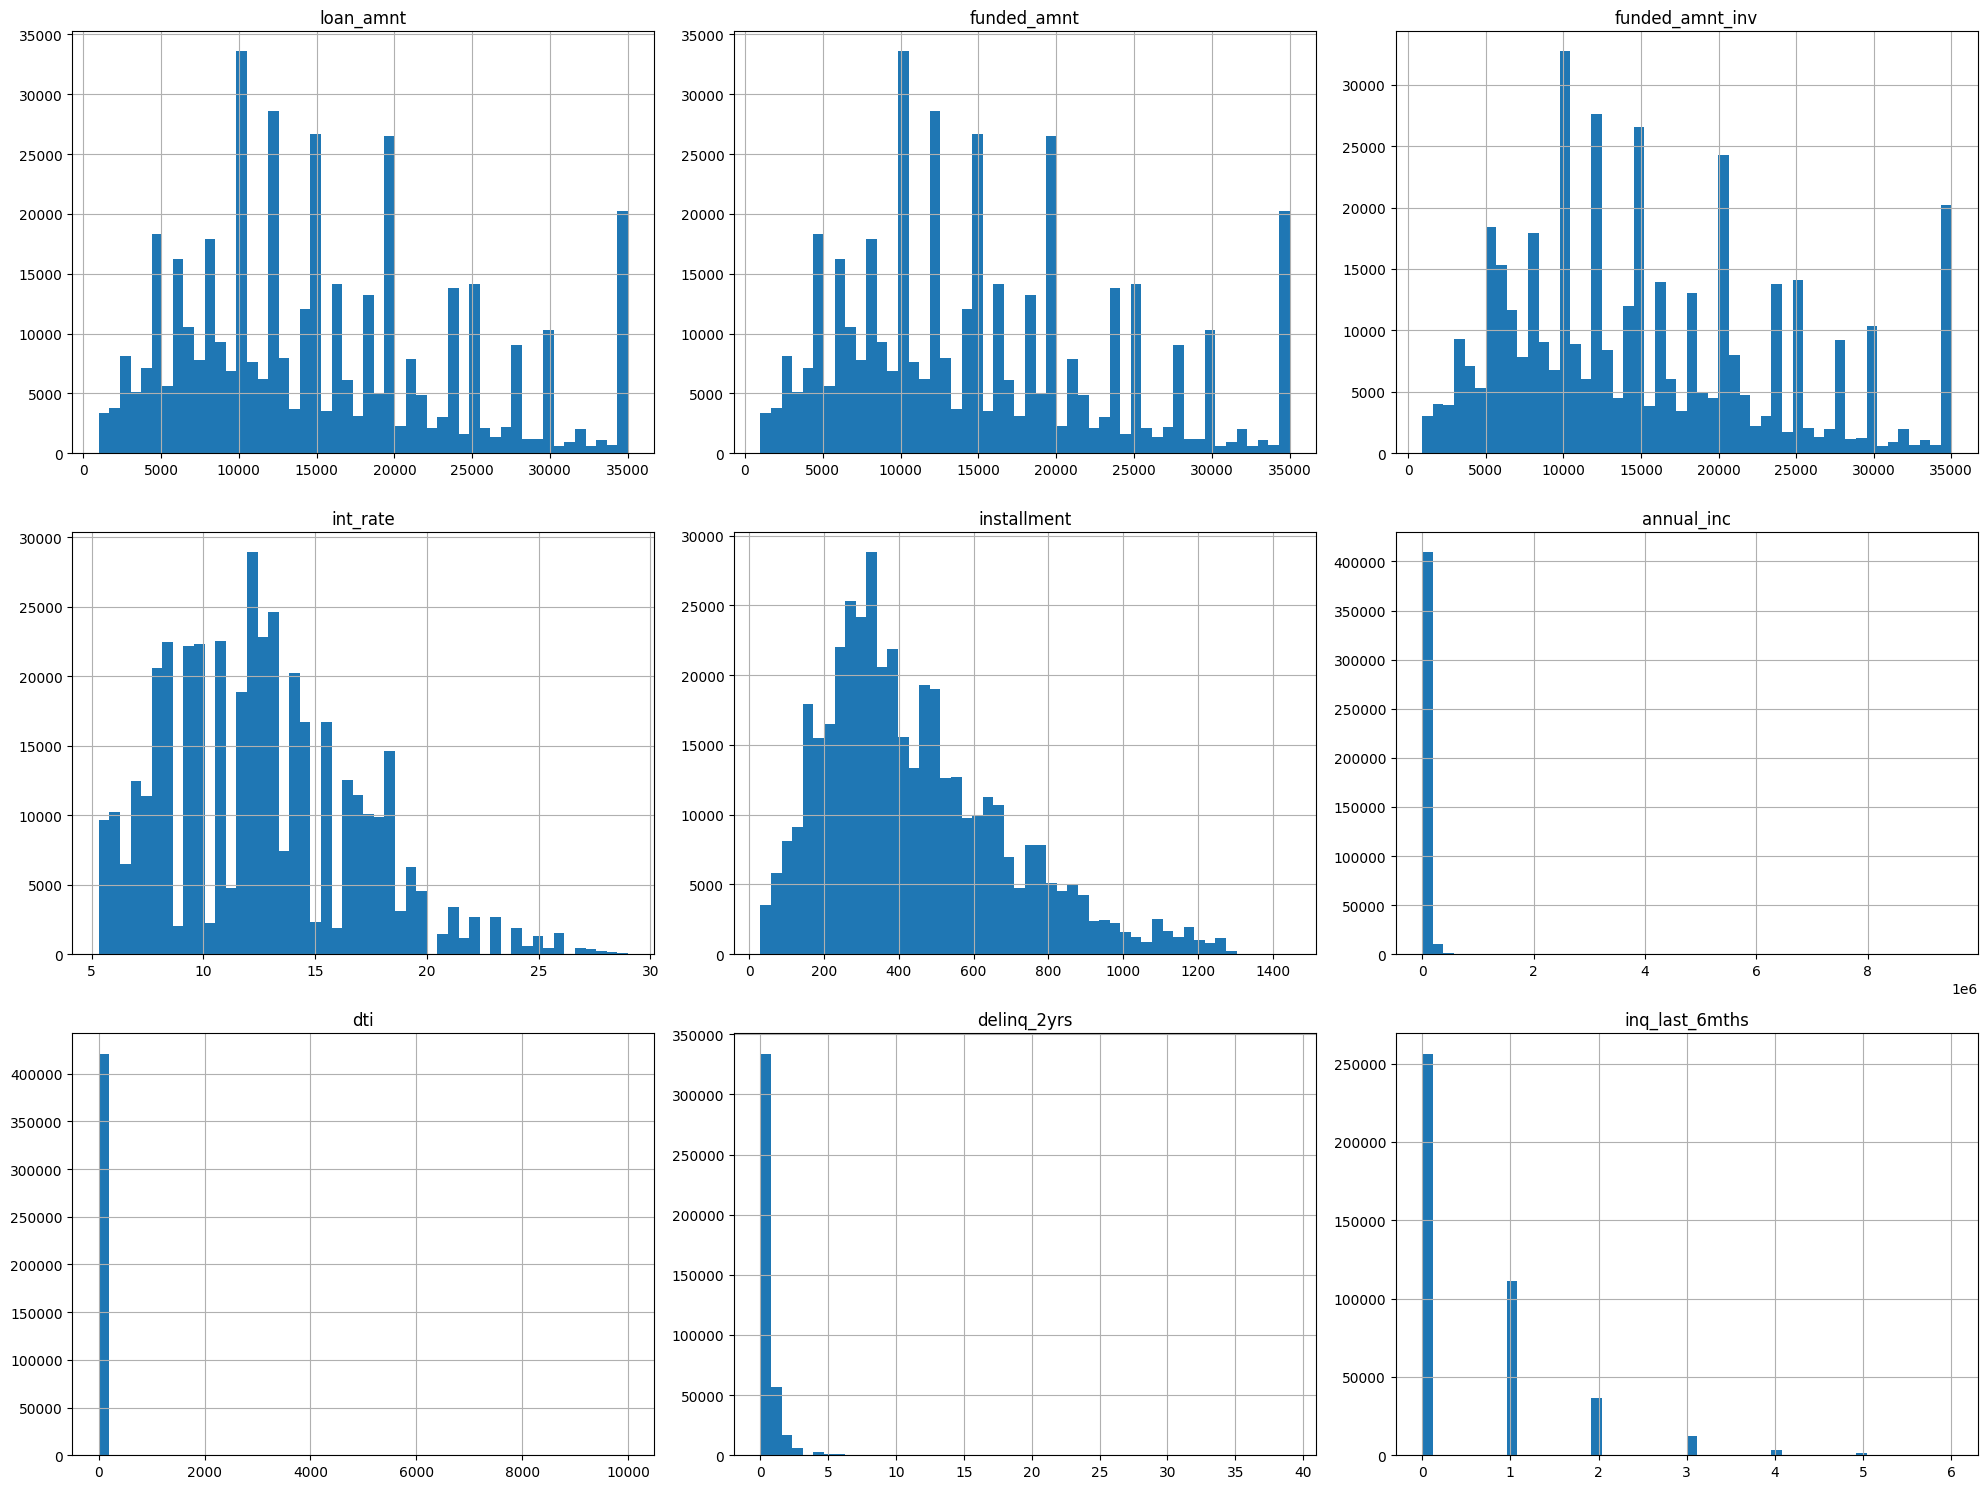

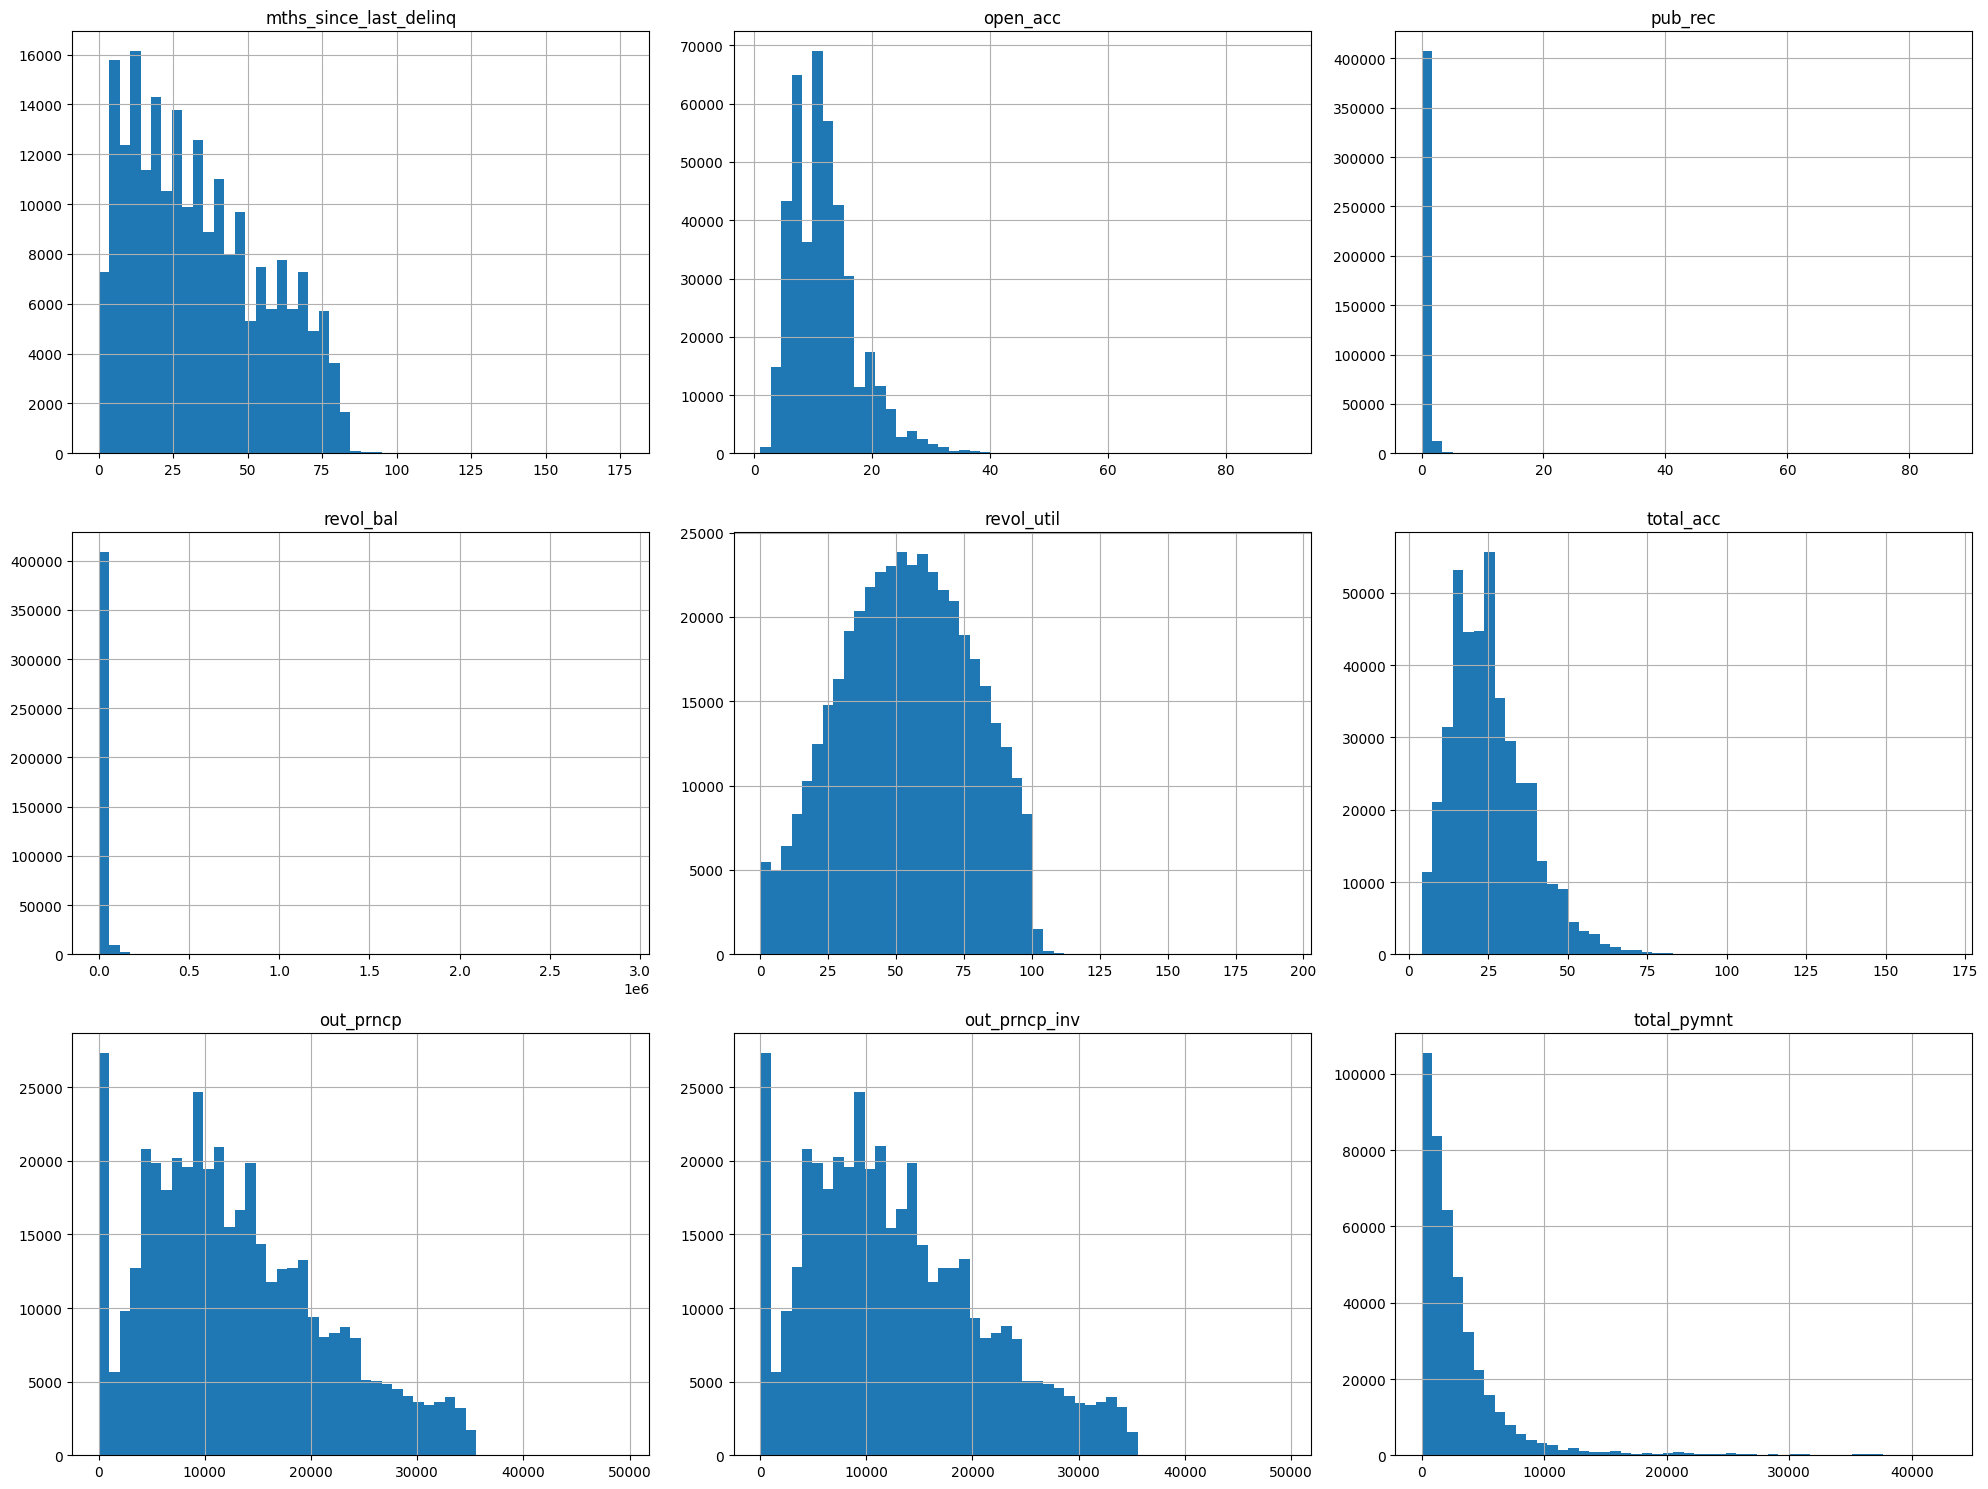

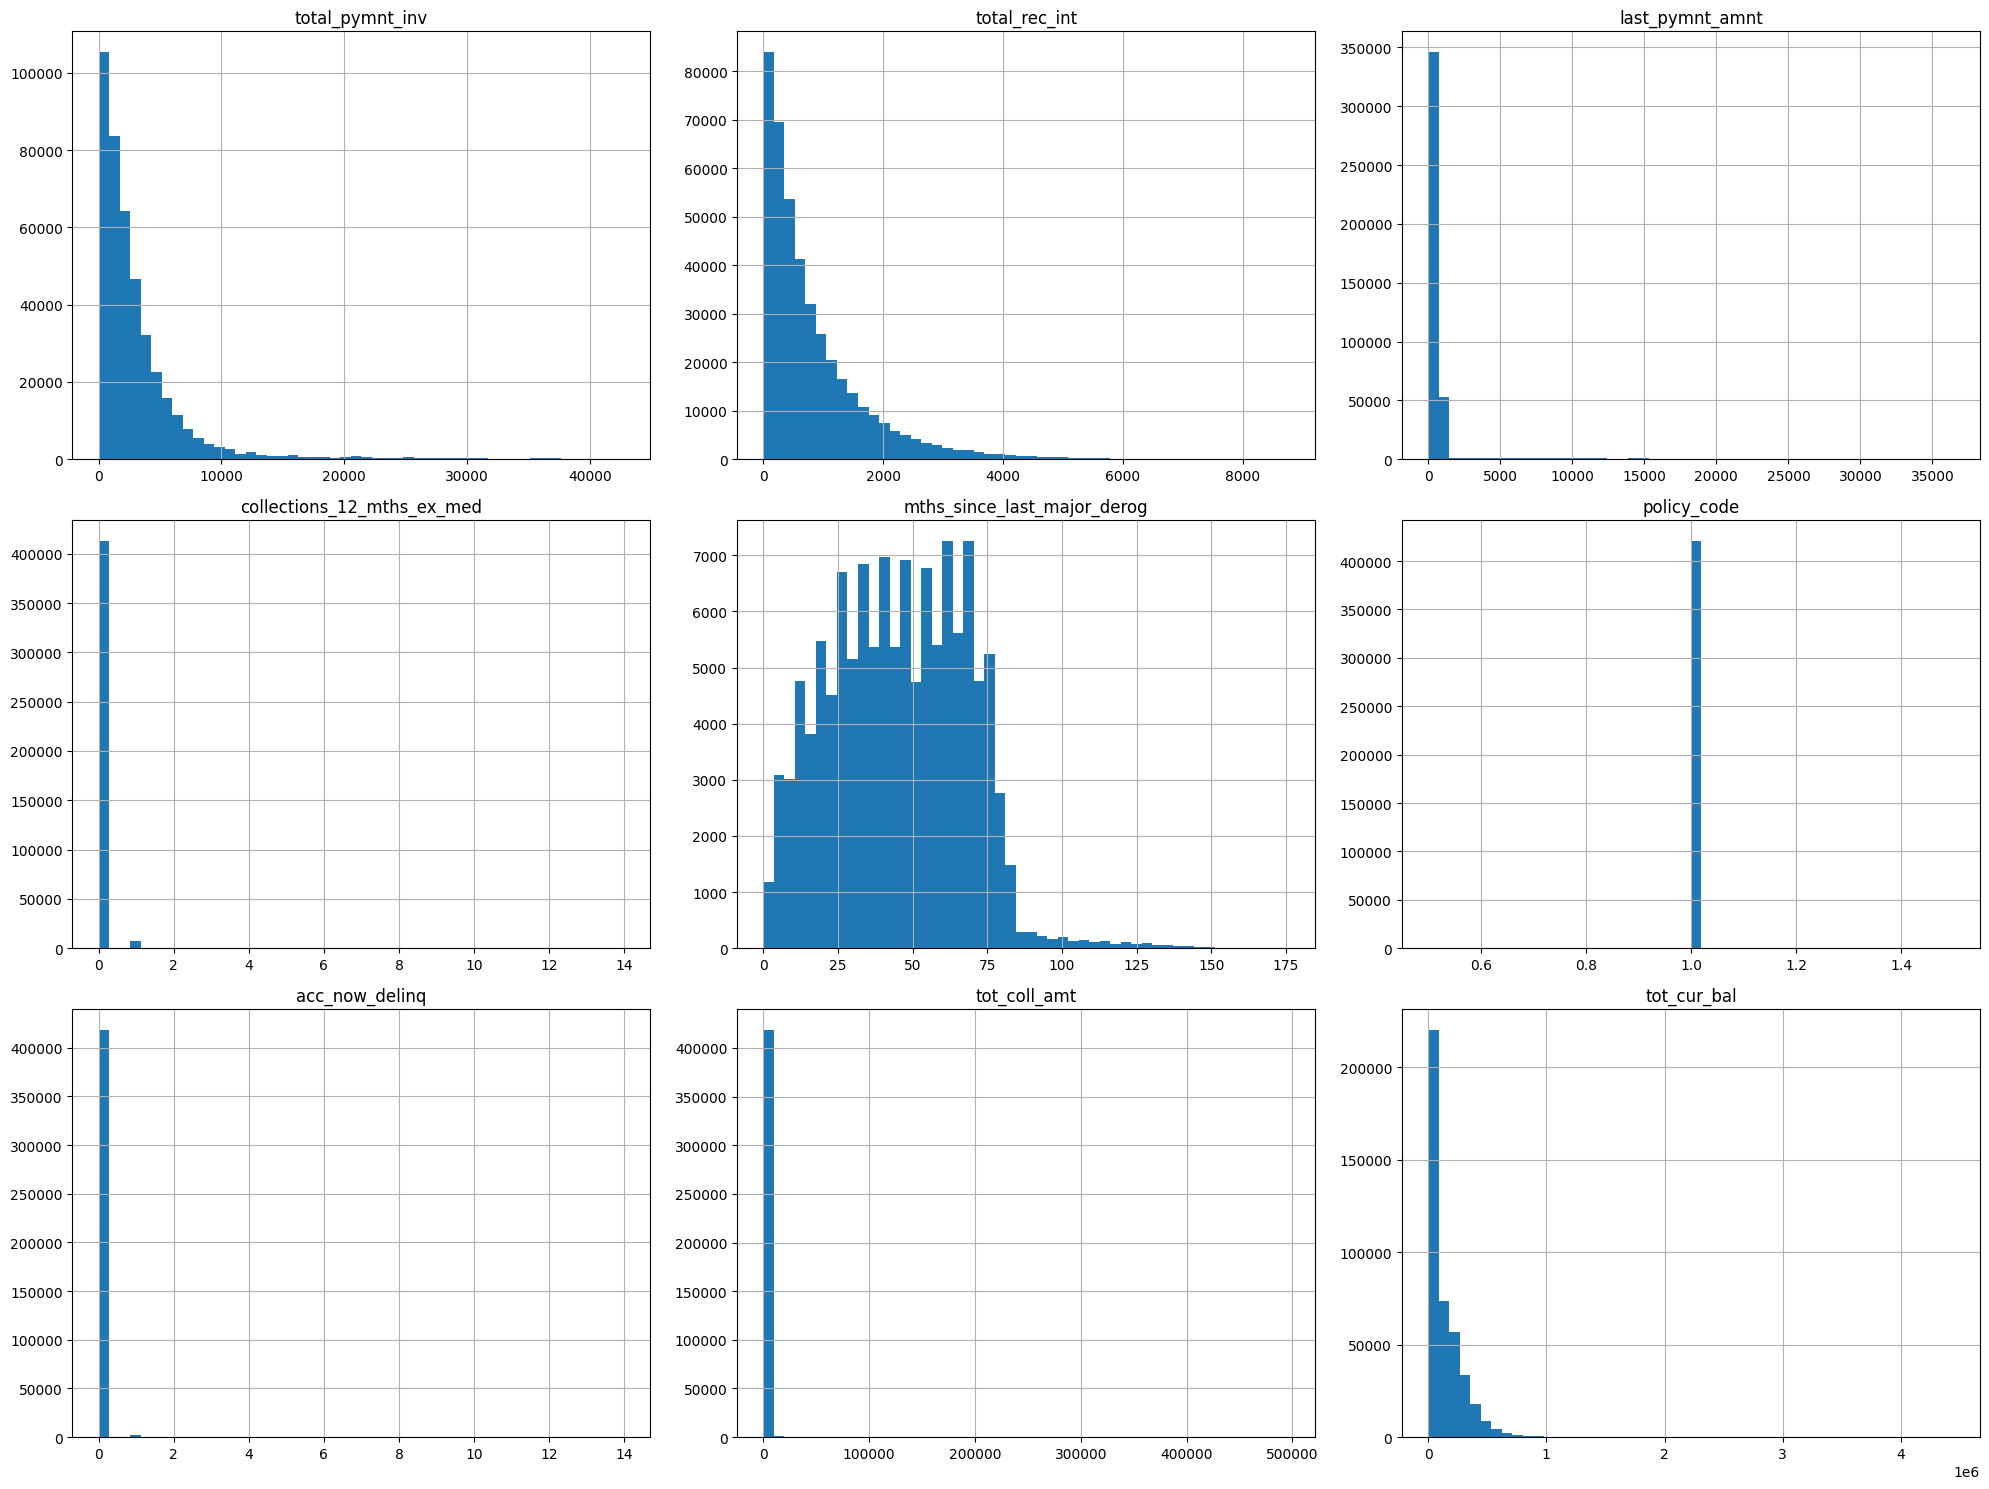

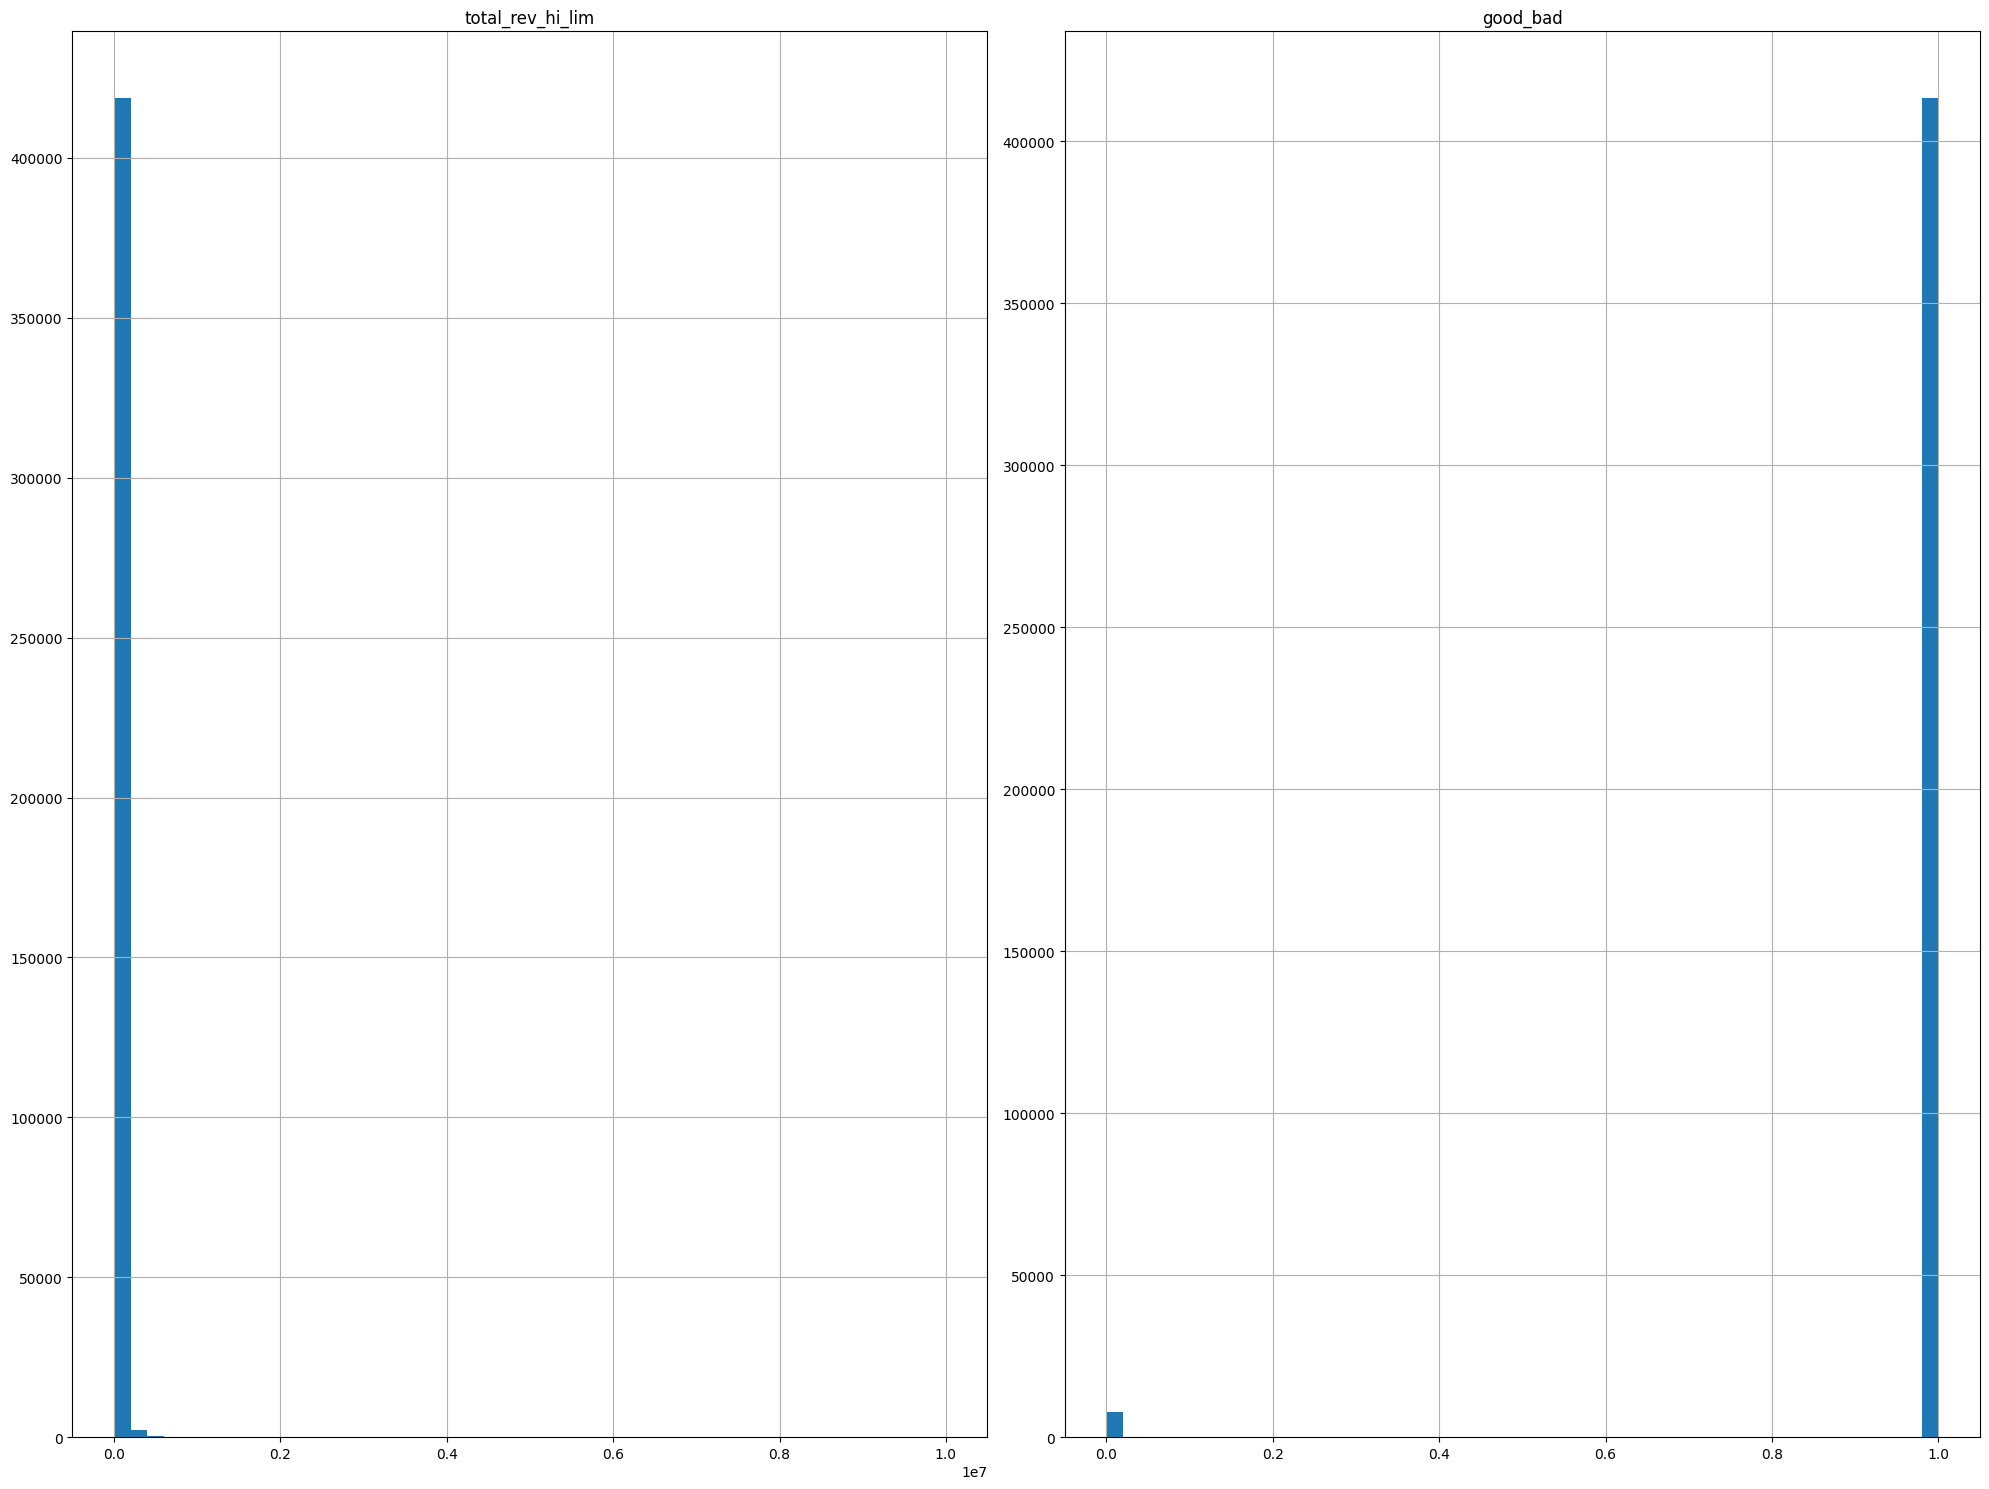

In [115]:
for i in range(0, len(numeric_columns), 9):  # 9 plots per figure
    df[numeric_columns[i:i+9]].hist(bins=50, figsize=(20, 15))
    plt.tight_layout()
    plt.show()

In [116]:
numeric_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'good_bad'],
      dtype='object')

In [117]:
def plot_heatmap(columns_subset):
    corr_matrix = df[columns_subset].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.show()

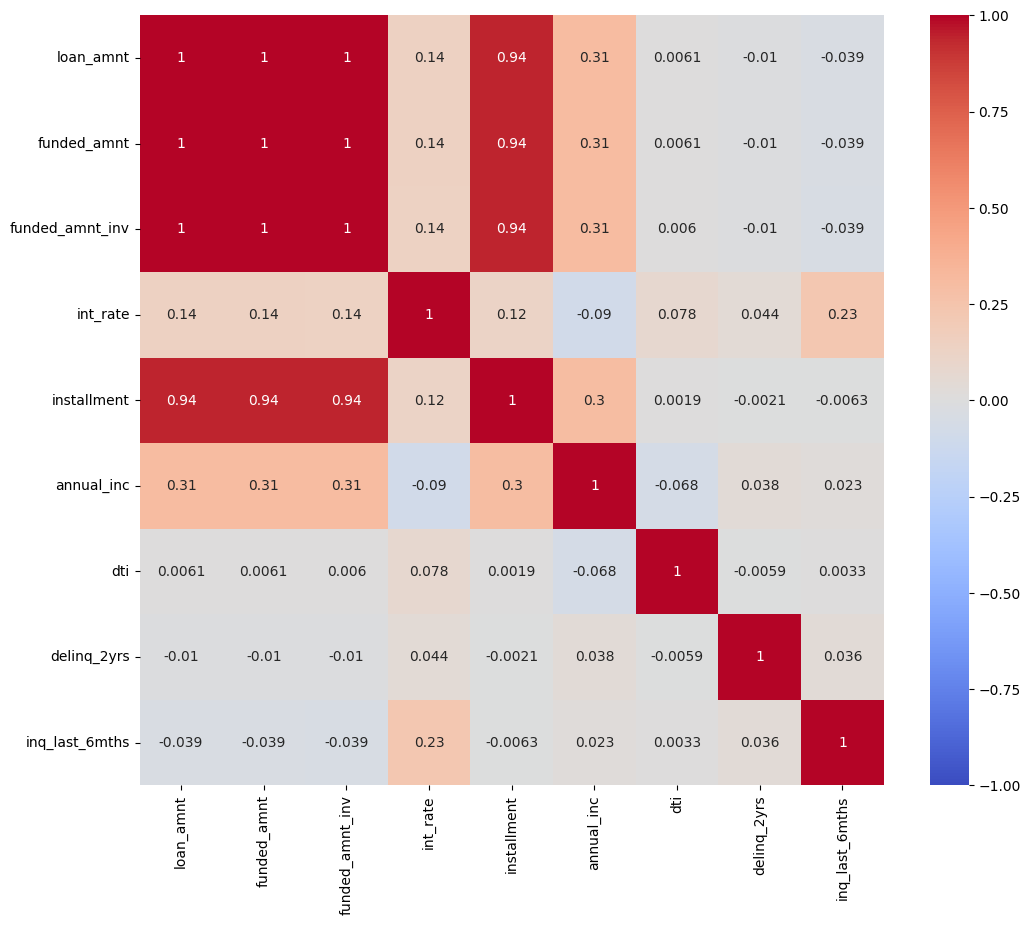

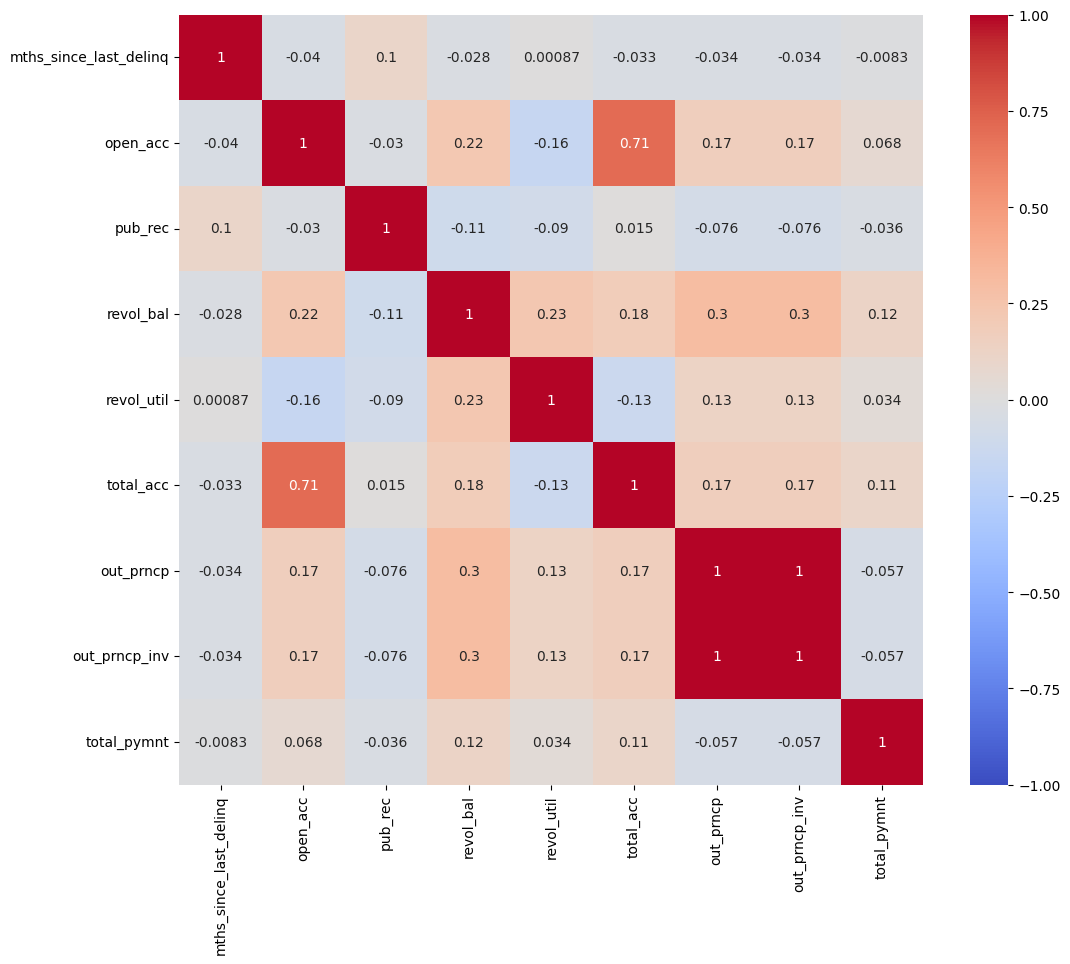

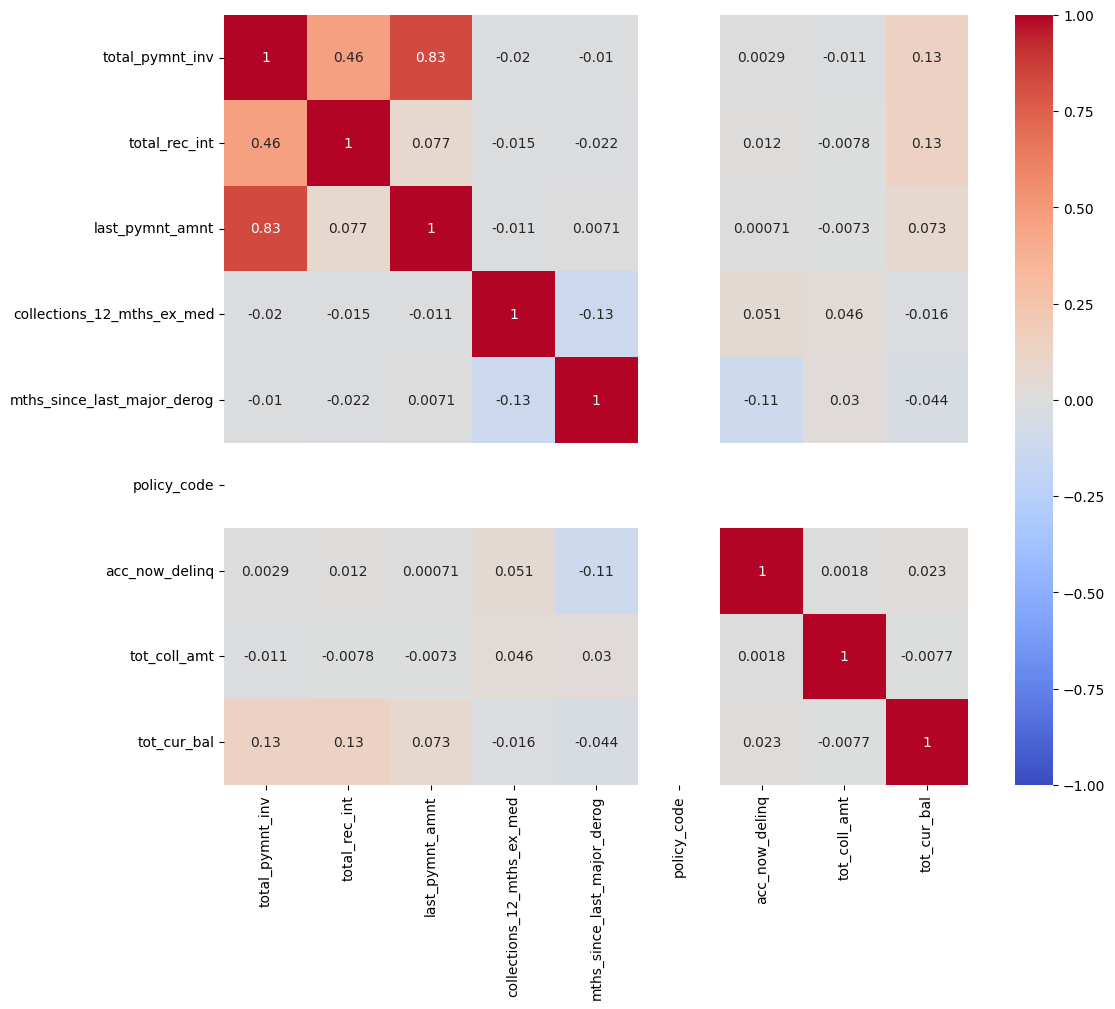

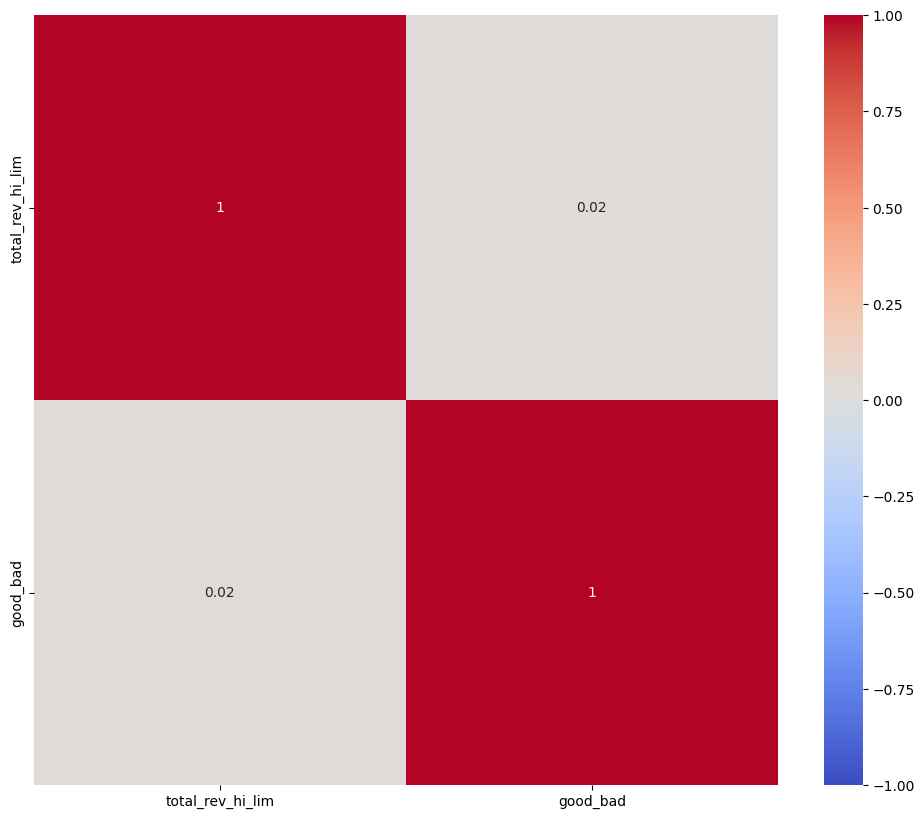

In [118]:
batch_size = 9  # Number of columns per heatmap
for i in range(0, len(numeric_columns), batch_size):
    plot_heatmap(numeric_columns[i:i+batch_size])

In [119]:
target_variable = 'good_bad'

In [120]:
X = df.drop(target_variable, axis=1)
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
X_train.shape


(336875, 42)

In [122]:
X_test.shape

(84219, 42)

In [123]:
numeric_cols= X_train.select_dtypes(include=['number']).columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

In [124]:
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].mean())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].mean())

In [125]:
def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower_bound, upper_bound)
    return df

In [126]:
X_train = remove_outliers(X_train)

In [127]:
#correlation_threshold = 0.7
#corr_matrix = X_train.corr().abs()

In [128]:
pd.set_option('display.max_columns', None)
X_train.head(50)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
308635,35000,35000,35000,60 months,15.61,843.90,D,2 years,RENT,160862.5,Source Verified,Apr-15,n,credit_card,OK,6.82,0,Sep-88,1.0,34.040955,6.0,0,42924,70.6,20.0,w,31314.91,31314.91,7564.7500,7564.75,2480.5525,Jan-16,843.90,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,56289.0,60800
92420,4000,4000,4000,36 months,10.99,130.94,B,NaN,RENT,24000.0,Not Verified,Oct-15,n,debt_consolidation,SC,38.00,0,Oct-82,0.0,40.102387,5.0,0,20008,67.6,11.0,w,3810.53,3810.53,263.1000,263.10,73.6300,Jan-16,130.94,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,29853.0,29600
336354,9000,9000,9000,36 months,9.99,290.37,B,< 1 year,RENT,42240.0,Source Verified,Feb-15,n,home_improvement,CA,25.34,0,Jan-07,0.0,23.938568,12.0,0,3995,19.7,18.0,w,6763.02,6763.02,2898.7000,2898.70,661.7200,Dec-15,290.37,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,20837.0,20300
137359,7000,7000,7000,36 months,12.69,234.82,C,10+ years,MORTGAGE,89000.0,Not Verified,Sep-15,n,debt_consolidation,CT,5.46,0,Oct-96,0.0,34.040955,12.0,0,7457,76.0,33.0,w,6346.55,6346.55,929.4100,929.41,275.9600,Jan-16,234.82,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,224092.0,9750
231186,23375,23375,23375,60 months,16.99,580.81,D,7 years,MORTGAGE,60000.0,Source Verified,Jun-15,n,debt_consolidation,TX,24.04,0,Dec-07,0.0,34.040955,11.0,0,2391,17.6,14.0,w,21549.92,21549.92,4021.5400,4021.54,2196.4600,Jan-16,580.81,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,22870.0,13600
157558,15000,15000,15000,60 months,12.29,335.87,C,5 years,MORTGAGE,62000.0,Not Verified,Aug-15,n,home_improvement,GA,38.31,0,Jan-00,0.0,23.938568,15.0,0,10002,25.9,31.0,f,14259.74,14259.74,1333.2400,1333.24,592.9800,Dec-15,335.87,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,118547.0,38600
376872,10000,10000,10000,36 months,14.31,343.29,C,3 years,RENT,110000.0,Source Verified,Jan-15,n,house,NC,10.29,0,Jul-06,0.0,37.000000,6.0,0,2907,44.0,10.0,f,7131.00,7131.00,4128.6900,4128.69,1242.5300,Jan-16,343.29,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,32736.0,6600
375714,16150,16150,16150,36 months,17.14,576.92,D,2 years,RENT,45000.0,Not Verified,Jan-15,n,debt_consolidation,MI,31.07,0,Jul-05,0.0,34.040955,21.0,0,13723,96.0,41.0,f,11652.62,11652.62,7003.4300,7003.43,2480.5525,Jan-16,576.92,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,110828.0,14300
26857,30000,30000,30000,36 months,8.38,945.36,B,10+ years,MORTGAGE,160862.5,Source Verified,Dec-15,n,debt_consolidation,NJ,12.52,0,Mar-86,1.0,23.938568,25.5,0,38652,31.7,54.5,f,29264.14,29264.14,931.3900,931.39,195.5300,Jan-16,945.36,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,412200.0,82650
386623,2000,2000,1975,36 months,12.29,66.71,C,3 years,RENT,50000.0,Not Verified,Jul-15,n,debt_consolidation,CT,20.98,0,Apr-02,0.0,34.040955,8.0,0,23348,67.3,11.0,f,0.00,0.00,2008.8800,1983.77,8.8800,Jul-15,1164.82,Jan-16,0,45.124164,1,INDIVIDUAL,0,0,39507.0,34700


In [129]:
non_numeric_cols

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [130]:
X_train['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [131]:
def encode_non_numerical(df):
    # Identify non-numerical columns
    non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

    for col in non_numeric_columns:
        if df[col].nunique() <= 10:  # For categorical variables with few categories
            # One-hot encoding
            df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)
        else:  # For categorical variables with many categories
            # Label encoding
            df[col] = pd.factorize(df[col])[0]

    return df

In [132]:
X_train = encode_non_numerical(X_train)
X_test = encode_non_numerical(X_test)

In [133]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [134]:
correlation_threshold = 0.7
corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [135]:
X_train.shape

(336875, 39)

In [136]:
X_test.shape

(84219, 39)

In [137]:
X_train.head(10)

,loan_amnt,int_rate,emp_length,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_JOINT
308635,35000,15.61,0,160862.5,0,0,0,6.82,0,0,1.0,34.040955,6.0,0,42924,70.6,7564.75,0,0,0,45.124164,1,0,0,56289.0,True,False,False,True,False,False,False,False,False,True,False,False,True,False
92420,4000,10.99,-1,24000.0,1,1,1,38.00,0,1,0.0,40.102387,5.0,0,20008,67.6,263.10,0,0,0,45.124164,1,0,0,29853.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
336354,9000,9.99,1,42240.0,2,2,2,25.34,0,2,0.0,23.938568,12.0,0,3995,19.7,2898.70,1,0,0,45.124164,1,0,0,20837.0,False,True,False,False,False,False,False,False,False,True,False,False,True,False
137359,7000,12.69,2,89000.0,3,1,3,5.46,0,3,0.0,34.040955,12.0,0,7457,76.0,929.41,0,0,0,45.124164,1,0,0,224092.0,False,False,True,False,False,False,False,True,False,False,False,False,True,False
231186,23375,16.99,3,60000.0,4,1,4,24.04,0,4,0.0,34.040955,11.0,0,2391,17.6,4021.54,0,0,0,45.124164,1,0,0,22870.0,True,False,False,True,False,False,False,True,False,True,False,False,True,False
157558,15000,12.29,4,62000.0,5,2,5,38.31,0,5,0.0,23.938568,15.0,0,10002,25.9,1333.24,1,0,0,45.124164,1,0,0,118547.0,True,False,True,False,False,False,False,True,False,False,False,False,False,False
376872,10000,14.31,5,110000.0,6,3,6,10.29,0,6,0.0,37.000000,6.0,0,2907,44.0,4128.69,0,0,0,45.124164,1,0,0,32736.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False
375714,16150,17.14,0,45000.0,6,1,7,31.07,0,7,0.0,34.040955,21.0,0,13723,96.0,7003.43,0,0,0,45.124164,1,0,0,110828.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False
26857,30000,8.38,2,160862.5,7,1,8,12.52,0,8,1.0,23.938568,25.5,0,38652,31.7,931.39,0,0,0,45.124164,1,0,0,412200.0,False,True,False,False,False,False,False,True,False,True,False,False,False,False
386623,2000,12.29,5,50000.0,8,1,3,20.98,0,9,0.0,34.040955,8.0,0,23348,67.3,2008.88,2,0,0,45.124164,1,0,0,39507.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [138]:
class WoEBinner:
    def __init__(self, n_bins=10):
        self.n_bins = n_bins
        self.woe_dict = {}

    def fit(self, X, y):
        for column in X.columns:
            if X[column].dtype in ['int64', 'float64']:
                self.woe_dict[column] = self._calculate_woe(X[column], y)

    def transform(self, X):
        X_woe = X.copy()
        for column in self.woe_dict:
            X_woe[column] = X_woe[column].map(self.woe_dict[column])
        return X_woe

    def _calculate_woe(self, feature, target):
        bins = pd.qcut(feature, q=self.n_bins, duplicates='drop')
        woe_dict = {}
        for bin in bins.unique():
            woe = np.log((target[bins == bin].mean() + 0.001) / (1 - target[bins == bin].mean() + 0.001))
            woe_dict[bin] = woe
        return woe_dict

woe_binner = WoEBinner()
woe_binner.fit(X_train, y_train)
X_train_woe = woe_binner.transform(X_train)
X_test_woe = woe_binner.transform(X_test)

In [139]:
X_train.shape

(336875, 39)

In [140]:
X_test.shape

(84219, 39)

In [141]:
X_train_woe.head(10)

,loan_amnt,int_rate,emp_length,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_JOINT
308635,3.789313,3.469348,3.805523,4.191765,4.104286,3.950296,3.846599,4.176088,NaN,3.880745,3.991523,3.927771,3.886712,NaN,4.086379,3.867841,4.708391,5.750821,4.013448,NaN,NaN,NaN,NaN,NaN,3.743320,True,False,False,True,False,False,False,False,False,True,False,False,True,False
92420,3.951904,4.442991,3.805523,3.628819,4.104286,3.950296,3.846599,3.493461,NaN,3.880745,3.991523,NaN,3.886712,NaN,4.034755,3.891188,4.166251,5.750821,4.013448,NaN,NaN,NaN,NaN,NaN,3.748578,False,True,False,False,False,False,False,False,False,False,False,False,True,False
336354,3.973225,4.817805,3.746131,3.712829,3.079349,3.874171,3.846599,3.797370,NaN,3.880745,3.991523,3.824843,3.791404,NaN,3.798191,3.942005,3.738841,4.949672,4.013448,NaN,NaN,NaN,NaN,NaN,3.755101,False,True,False,False,False,False,False,False,False,True,False,False,True,False
137359,4.001716,4.022521,4.073007,4.056976,4.802717,3.950296,3.921198,4.176088,NaN,3.880745,3.991523,3.927771,3.791404,NaN,3.855372,3.867841,3.732766,5.750821,4.013448,NaN,NaN,NaN,NaN,NaN,4.097434,False,False,True,False,False,False,False,True,False,False,False,False,True,False
231186,4.014213,3.297101,3.764503,3.878953,4.142362,3.950296,3.921198,3.797370,NaN,3.880745,3.991523,3.927771,3.842693,NaN,3.617807,3.942005,3.860308,5.750821,4.013448,NaN,NaN,NaN,NaN,NaN,3.755101,True,False,False,True,False,False,False,True,False,True,False,False,True,False
157558,3.951926,4.297375,3.880675,3.878953,4.142362,3.874171,3.967620,3.493461,NaN,3.880745,3.991523,3.824843,3.948245,NaN,3.924595,4.026636,3.714862,4.949672,4.013448,NaN,NaN,NaN,NaN,NaN,3.872948,True,False,True,False,False,False,False,True,False,False,False,False,False,False
376872,3.973225,3.935567,3.880675,4.113821,2.931703,3.874171,3.967620,4.107489,NaN,3.880745,3.991523,3.871761,3.886712,NaN,3.617807,4.034042,3.860308,5.750821,4.013448,NaN,NaN,NaN,NaN,NaN,3.748578,False,False,True,False,False,False,False,False,False,True,False,False,False,False
375714,3.906162,3.297101,3.805523,3.807835,2.931703,3.950296,3.958242,3.697322,NaN,3.880745,3.991523,3.927771,4.001926,NaN,3.913875,3.589732,4.708391,5.750821,4.013448,NaN,NaN,NaN,NaN,NaN,3.872948,False,False,False,True,False,False,False,False,False,False,False,False,False,False
26857,3.789313,4.817805,4.073007,4.191765,6.908755,3.950296,3.958242,4.086209,NaN,3.880745,3.991523,3.824843,4.001926,NaN,4.086379,4.026636,3.732766,5.750821,4.013448,NaN,NaN,NaN,NaN,NaN,4.265141,False,True,False,False,False,False,False,True,False,True,False,False,False,False
386623,3.951904,4.297375,3.880675,3.807835,4.084305,3.950296,3.921198,4.001910,NaN,3.880745,3.991523,3.927771,3.899458,NaN,4.034755,3.891188,3.714104,0.975456,4.013448,NaN,NaN,NaN,NaN,NaN,3.735453,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [142]:
X_train_woe.shape

(336875, 39)

In [143]:
X_test_woe.shape

(84219, 39)

In [144]:
cols_with_nan_train = set(X_train_woe.columns[X_train_woe.isnull().any()])
cols_with_nan_test = set(X_test_woe.columns[X_test_woe.isnull().any()])
cols_with_nan = cols_with_nan_train | cols_with_nan_test

In [145]:
cols_with_nan_train

{'acc_now_delinq',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'policy_code',
 'pub_rec',
 'tot_coll_amt'}

In [146]:
cols_with_nan_test

{'acc_now_delinq',
 'annual_inc',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'inq_last_6mths',
 'int_rate',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'open_acc',
 'policy_code',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_pymnt'}

In [152]:
cols_with_nan

{'acc_now_delinq',
 'annual_inc',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'inq_last_6mths',
 'int_rate',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'open_acc',
 'policy_code',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_pymnt'}

In [153]:
X_train_woe = X_train_woe.drop(cols_with_nan, axis=1)
X_test_woe = X_test_woe.drop(cols_with_nan, axis=1)

In [154]:
assert set(X_train_woe.columns) == set(X_test_woe.columns)

In [97]:
#X_train_woe=X_train_woe.dropna(axis=1)
#X_test_woe=X_test_woe.dropna(axis=1)

In [155]:
X_train_woe.shape

(336875, 22)

In [156]:
X_test_woe.shape

(84219, 22)

In [157]:
# Logistic Regression
from sklearn.pipeline import make_pipeline

lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200, random_state=42))
lr_pipeline.fit(X_train_woe, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=200, random_state=42))])

In [158]:
lr_pred = lr_pipeline.predict_proba(X_test_woe)[:, 1]

In [160]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_woe, y_train)

RandomForestClassifier(random_state=42)

In [161]:
rf_pred = rf_model.predict_proba(X_test_woe)[:, 1]

In [163]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_woe, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [164]:
xgb_pred = xgb_model.predict_proba(X_test_woe)[:, 1]

In [165]:
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred > 0.5)
    auc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Confusion Matrix:\n", cm)
    print(f"{model_name} AUC: {auc}")

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

Logistic Regression Confusion Matrix:
 [[  622   926]
 [ 6281 76390]]
Logistic Regression AUC: 0.832292764442174
Random Forest Confusion Matrix:
 [[  631   917]
 [ 7026 75645]]
Random Forest AUC: 0.8103762190260282
XGBoost Confusion Matrix:
 [[  662   886]
 [ 7395 75276]]
XGBoost AUC: 0.8065969371072916


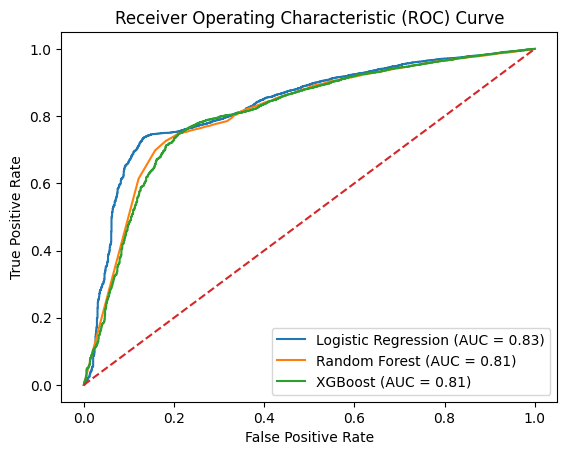

In [166]:
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [167]:
def create_scorecard(model, X):
    # Assuming logistic regression is the best model
    base_score = 600
    pdo = 20
    odds = 50

    # Calculate score for each feature
    feature_scores = {}
    for feature, coef in zip(X.columns, model.coef_[0]):
        score = -coef * (pdo / np.log(2))
        feature_scores[feature] = score

    # Calculate intercept score
    intercept_score = -model.intercept_[0] * (pdo / np.log(2)) + base_score - pdo * np.log(odds) / np.log(2)

    return feature_scores, intercept_score

# Assuming logistic regression is the best model
feature_scores, intercept_score = create_scorecard(lr_model, X_train_woe)

# Calculate credit scores for test set
def calculate_credit_score(row, feature_scores, intercept_score):
    score = intercept_score
    for feature, value in row.items():
        if feature in feature_scores:
            score += feature_scores[feature] * value
    return max(300, min(850, int(score)))

X_test_woe['credit_score'] = X_test_woe.apply(lambda row: calculate_credit_score(row, feature_scores, intercept_score), axis=1)

print(X_test_woe['credit_score'].describe())

count    84219.000000
mean       484.384961
std         42.465135
min        300.000000
25%        464.000000
50%        485.000000
75%        511.000000
max        596.000000
Name: credit_score, dtype: float64


In [169]:
X_test_woe

,loan_amnt,emp_length,issue_d,purpose,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_JOINT,credit_score
375979,4.001716,3.805523,4.104286,3.950296,3.846599,3.880745,5.750821,4.013448,False,False,False,False,False,False,True,0,False,False,True,0,False,False,420
303172,3.973225,3.746131,4.104286,3.950296,3.846599,3.880745,5.750821,4.013448,False,False,False,False,False,False,False,0,False,True,False,0,True,False,476
316388,4.014213,4.073007,3.079349,3.874171,3.846599,3.880745,5.750821,4.013448,False,False,False,False,False,False,False,0,False,False,True,0,True,False,487
46926,3.951904,3.805523,4.802717,3.874171,3.921198,3.880745,5.750821,4.013448,False,False,False,False,False,False,False,0,False,False,False,0,True,False,454
391889,3.906162,3.746131,4.104286,3.950296,3.921198,3.880745,4.949672,2.714269,True,False,False,True,False,False,False,0,False,True,False,0,True,False,564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389351,3.951904,3.880675,4.142362,3.874171,3.967620,3.860482,0.975456,2.714269,False,True,False,False,False,False,False,0,False,False,False,0,False,False,459
12230,3.973225,3.789513,4.084305,3.950296,4.152162,3.893577,5.750821,4.013448,False,False,False,False,False,False,False,0,False,True,False,0,True,False,471
82751,3.768649,3.853973,2.931703,3.874171,3.861960,3.893577,0.975456,4.013448,True,False,False,False,False,True,False,0,False,False,True,0,True,False,396
395169,3.951926,3.746131,3.079349,3.874171,3.921198,3.911681,0.975456,2.714269,True,True,False,False,False,False,False,0,False,True,False,0,True,False,535
